### More nearest neighbor regression
* Define and fit a nonlinear function (cubic) 
* This lets us control precisely the overfitting

In [1]:
%matplotlib inline
# import helper tools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
# shut down warning massages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define a nice cubic function with some noise
# N = nummber of points
# noise = Gaussian noise std
def cubicData(N,noise):
    X = np.random.uniform(size=(N,1),low=-5.,high=5.)
    addNoise = noise*np.random.standard_normal(size=N)
    y = -(X[:,0]+7.)**2. + X[:,0]**3.+addNoise
    return X,y

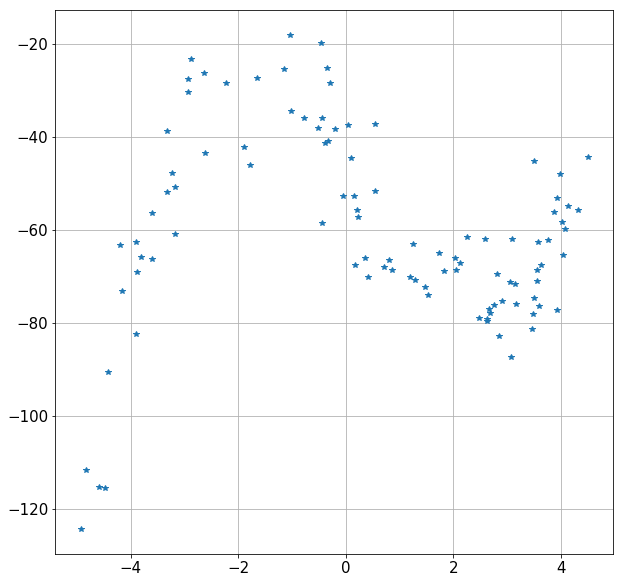

In [3]:
# Generate and plot data set
X,y = cubicData(100,10.)
# set plotting params.
width = 10
height = 10
plt.figure(figsize=(width, height))
plt.rcParams.update({'font.size':15})
plt.plot(X[:,0],y,'*')
plt.grid()

In [4]:
# Split data into train and test, and
# fit nearest neighbors
# Note: setings on test/train split to 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# instantiate the model and set the number of neighbors
reg = KNeighborsRegressor(n_neighbors=2)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
# print train/test scores (R-squared)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.8462407758766743
0.6006641362309755


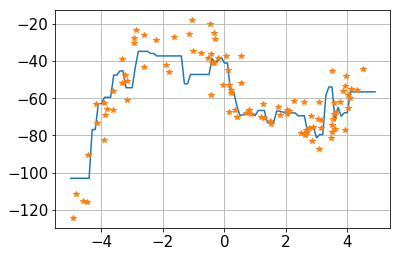

In [5]:
# Set up a series
xplot = np.arange(start=-5., stop=5.,step=0.1)
# This is tricky.  Need to convert it to a Nx1 matrix for scikit learn
xplot = np.reshape(xplot,(len(xplot),1))
# Generate forecastand plot
yfit = reg.predict(xplot)
plt.plot(xplot,yfit)
plt.plot(X[:,0],y,'*')
plt.grid()

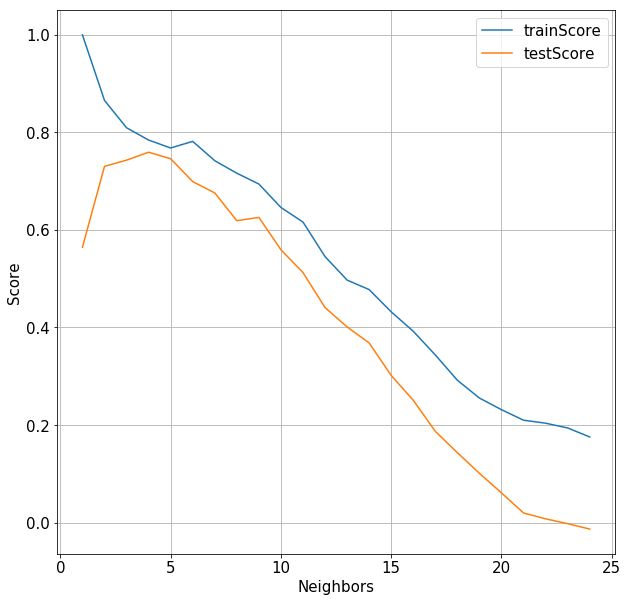

In [6]:
# Set up nearest neighbor fits for varying [1,nrange] neighbors
# plot train and test scores (R-squared)
nrange = 25
trainScore = []
testScore  = []
neighborList = []
# Generate some clean data
X,y = cubicData(100,10.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

for neighbors in range(1,nrange):
    reg = KNeighborsRegressor(n_neighbors=neighbors)
    reg.fit(X_train,y_train)
    trainScore.append(reg.score(X_train,y_train))
    testScore.append(reg.score(X_test,y_test))
    neighborList.append(neighbors)

width = 10
height = 10
plt.figure(figsize=(width, height))
plt.rcParams.update({'font.size':15})
plt.plot(neighborList,trainScore)
plt.plot(neighborList,testScore)
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.legend(["trainScore","testScore"])
plt.grid()

### Summary
* Simple nearest neighbor regression with nonlinear function and noise
* This gives a nice picture of under/over fitting